<a href="https://colab.research.google.com/github/manobhiram-123/House_price_prediction/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("AmesHousing.csv")
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Pool QC,2917
Misc Feature,2824
Alley,2732
Fence,2358
Mas Vnr Type,1775
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [ ]:
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print(missing_percent)

Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Mas Vnr Type      60.580205
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Qual        5.426621
Garage Cond        5.426621
Garage Yr Blt      5.426621
Garage Finish      5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
Bsmt Cond          2.730375
Bsmt Qual          2.730375
BsmtFin Type 1     2.730375
Mas Vnr Area       0.784983
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
BsmtFin SF 1       0.034130
BsmtFin SF 2       0.034130
Electrical         0.034130
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
Garage Area        0.034130
Garage Cars        0.034130
dtype: float64


In [ ]:
df=df.drop(['Pool QC','Misc Feature','Alley','Fence','Mas Vnr Type'],axis=1)

In [ ]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,IR1,Low,AllPub,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [ ]:
df['Fireplace Qu'].unique()

array(['Gd', nan, 'TA', 'Po', 'Ex', 'Fa'], dtype=object)

In [ ]:
fireplace_quality = {
    'Ex': 'Excellent',
    'Gd': 'Good',
    'TA': 'Average',
    'Fa': 'Fair',
    'Po': 'Poor'
}

df['Fireplace Quality'] = df['Fireplace Qu'].map(fireplace_quality)
df.drop(columns='Fireplace Qu',inplace=True)

In [ ]:
df['Fireplace Quality'].fillna('No Fireplace', inplace=True)

/tmp/ipython-input-3572848648.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fireplace Quality'].fillna('No Fireplace', inplace=True)


In [ ]:
df['Fireplace Quality'].isnull().sum()

np.int64(0)

In [ ]:
df['Neighborhood']

,Neighborhood
0,NAmes
1,NAmes
2,NAmes
3,NAmes
4,Gilbert
...,...
2925,Mitchel
2926,Mitchel
2927,Mitchel
2928,Mitchel


In [ ]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(
    lambda x: x.fillna(x.median())
)

In [ ]:
df['Lot Frontage'].fillna(df['Lot Frontage'].median(), inplace=True)

/tmp/ipython-input-2943091932.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lot Frontage'].fillna(df['Lot Frontage'].median(), inplace=True)


In [ ]:
garage_qual_map = {
    'Ex': 'Excellent',
    'Gd': 'Good',
    'TA': 'Average',
    'Fa': 'Fair',
    'Po': 'Poor',
    np.nan: 'No Garage'
}
df['Garage Quality'] = df['Garage Qual'].map(garage_qual_map)

In [ ]:
df['Garage Quality']

,Garage Quality
0,Average
1,Average
2,Average
3,Average
4,Average
...,...
2925,Average
2926,Average
2927,No Garage
2928,Average


In [ ]:
df.drop(columns='Garage Qual',inplace=True)

In [ ]:
df['Garage Quality'] = df['Garage Quality'].fillna('No Garage')

In [ ]:
garage_finish_map = {
    'No Garage': 0,
    'Unf': 1,
    'RFn': 2,
    'Fin': 3
}

df['Garage Finish Score'] = df['Garage Finish'].map(garage_finish_map)

In [ ]:
df.drop(columns='Garage Finish',inplace=True)

In [ ]:
df['Garage Finish Score'] = df['Garage Finish Score'].fillna(0)

In [ ]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [ ]:
df['Garage Cond'] = df['Garage Cond'].fillna(0)

In [ ]:
garage_cond_score = {
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}

df['Garage Cond Score'] = df['Garage Cond'].map(garage_cond_score)

In [ ]:
df['Garage Cond Score']=df['Garage Cond Score'].fillna(0)

In [ ]:

df.drop(columns='Garage Cond', inplace=True)

In [ ]:
df['Garage Type'].fillna('No Garage', inplace=True)

/tmp/ipython-input-2202265852.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Garage Type'].fillna('No Garage', inplace=True)


In [ ]:
garage_type_map = {
    'No Garage': 0,
    'Detchd': 1,
    'Attchd': 2,
    'Basment': 3,
    'BuiltIn': 4,
    'CarPort': 5,
    '2Types': 6
}

df['Garage Type'] = df['Garage Type'].map(garage_type_map)

In [ ]:
df['Bsmt Exposure'].fillna('No Basement', inplace=True)

/tmp/ipython-input-2512327211.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bsmt Exposure'].fillna('No Basement', inplace=True)


In [ ]:
bsmt_exposure_score = {
    'No Basement': 0,
    'No': 1,
    'Mn': 2,
    'Av': 3,
    'Gd': 4
}

df['Bsmt Exposure'] = df['Bsmt Exposure'].map(bsmt_exposure_score)

In [ ]:
df['BsmtFin Type 2'].fillna('No Basement', inplace=True)

/tmp/ipython-input-2742063017.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BsmtFin Type 2'].fillna('No Basement', inplace=True)


In [ ]:
bsmtfin2_score = {
    'No Basement': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}

df['BsmtFin Type 2'] = df['BsmtFin Type 2'].map(bsmtfin2_score)

In [ ]:
df['BsmtFin Type 2'].fillna(0, inplace=True)

/tmp/ipython-input-3694048617.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BsmtFin Type 2'].fillna(0, inplace=True)


In [ ]:
df['BsmtFin Type 1'].fillna(0, inplace=True)

/tmp/ipython-input-1008101302.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BsmtFin Type 1'].fillna(0, inplace=True)


In [ ]:
bsmtfin1_score = {

    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}

df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map(bsmtfin1_score)

In [ ]:
bsmt_cond_score_map = {
    'No Basement': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5,
    np.nan: 0
}

df['Bsmt Cond'] = df['Bsmt Cond'].map(bsmt_cond_score_map)

In [ ]:
bsmt_qual_score_map = {
    'No Basement': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5,
     np.nan: 0
}

df['Bsmt Qual'] = df['Bsmt Qual'].map(bsmt_qual_score_map)

In [ ]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
df['Bsmt Full Bath'] = df['Bsmt Full Bath'].fillna(0)
df['Bsmt Half Bath'] = df['Bsmt Half Bath'].fillna(0)
df['BsmtFin SF 1'] = df['BsmtFin SF 1'].fillna(0)
df['BsmtFin SF 2'] = df['BsmtFin SF 2'].fillna(0)
df['Bsmt Unf SF'] = df['Bsmt Unf SF'].fillna(0)
df['Total Bsmt SF'] = df['Total Bsmt SF'].fillna(0)
df['Garage Cars'] = df['Garage Cars'].fillna(0)
df['Garage Area'] = df['Garage Area'].fillna(0)
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [ ]:
df['Electrical']

,Electrical
0,SBrkr
1,SBrkr
2,SBrkr
3,SBrkr
4,SBrkr
...,...
2925,SBrkr
2926,SBrkr
2927,SBrkr
2928,SBrkr


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Electrical'] = le.fit_transform(df['Electrical'])

In [ ]:
df.isnull().sum()

,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,0
...,...
SalePrice,0
Fireplace Quality,0
Garage Quality,0
Garage Finish Score,0


In [ ]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Kitchen Qual',
       'Functional', 'Paved Drive', 'Sale Type', 'Sale Condition',
       'Fireplace Quality', 'Garage Quality'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
df

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Fireplace Quality_Excellent,Fireplace Quality_Fair,Fireplace Quality_Good,Fireplace Quality_No Fireplace,Fireplace Quality_Poor,Garage Quality_Excellent,Garage Quality_Fair,Garage Quality_Good,Garage Quality_No Garage,Garage Quality_Poor
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,False,False,True,False,False,False,False,False,False,False
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,False,False,False,True,False,False,False,False,False,False
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,False,False,False,True,False,False,False,False,False,False
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,False,False,False,False,False,False,False,False,False,False
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,...,False,False,False,True,False,False,False,False,False,False
2926,2927,923276100,20,74.0,8885,5,5,1983,1983,0.0,...,False,False,False,True,False,False,False,False,False,False
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,...,False,False,False,True,False,False,False,False,True,False
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
BsmtFin Type 1,80
Order,0
MS SubClass,0
PID,0
Lot Area,0
...,...
Garage Quality_Excellent,0
Garage Quality_Fair,0
Garage Quality_Good,0
Garage Quality_No Garage,0


In [ ]:
df['BsmtFin Type 1']

,BsmtFin Type 1
0,4.0
1,3.0
2,5.0
3,5.0
4,6.0
...,...
2925,6.0
2926,4.0
2927,6.0
2928,5.0


In [ ]:
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].fillna(3)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Order,0
PID,0
MS SubClass,0
Lot Frontage,0
Lot Area,0
...,...
Garage Quality_Excellent,0
Garage Quality_Fair,0
Garage Quality_Good,0
Garage Quality_No Garage,0


In [ ]:
df.drop(['Order', 'PID'], axis=1, inplace=True)

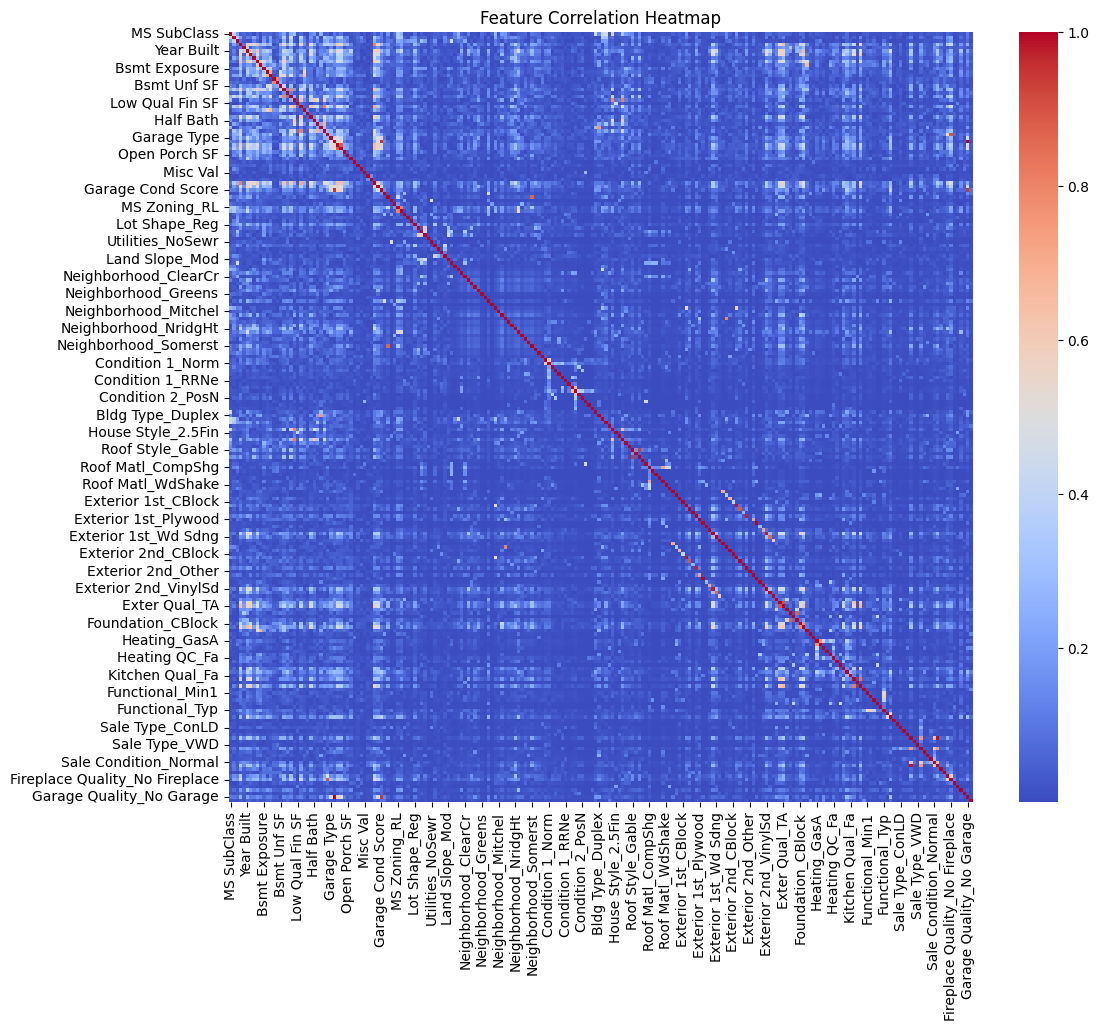

['Garage Cond Score',
 'Roof Style_Hip',
 'Exterior 2nd_CmentBd',
 'Exterior 2nd_MetalSd',
 'Exterior 2nd_PreCast',
 'Exterior 2nd_VinylSd',
 'Exter Qual_TA',
 'Sale Condition_Partial',
 'Garage Quality_No Garage']

In [ ]:
corr_matrix = df.corr().abs()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [column for column in upper.columns if any(upper[column] > 0.9)]
high_corr

In [ ]:
df.drop(high_corr, axis=1, inplace=True)

In [ ]:
corr_with_target = df.corr()['SalePrice'].sort_values(ascending=False)
print(corr_with_target)

SalePrice                         1.000000
Overall Qual                      0.799262
Gr Liv Area                       0.706780
Garage Cars                       0.647562
Garage Area                       0.640138
                                    ...   
Lot Shape_Reg                    -0.300461
Heating QC_TA                    -0.338520
Foundation_CBlock                -0.349642
Fireplace Quality_No Fireplace   -0.481446
Kitchen Qual_TA                  -0.526721
Name: SalePrice, Length: 213, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
x= df.drop('SalePrice', axis=1)
y = df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)*100

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")

MAE:  17306.37
RMSE: 30263.15
R²:   88.58
